# Coloring Well Log Data

### This notebook reads in well log LAS files and colors the gamma-ray curve like you would in a petrophysical package

This first cell installs lasio which is used to read in LAS well logs https://lasio.readthedocs.io/en/latest/

In [ ]:
! pip install lasio

Next let's import some packages

In [1]:
import numpy as np
import lasio #for reading in LAS files
import matplotlib.pyplot as plt #for plotting
import matplotlib as mpl #for making a colormap
from scipy.stats import norm #for normalizing the colormap

%matplotlib inline 

This next cell is the quick and easy way to read in LAS files in python using lasio

In [2]:
well_log = lasio.read(r'533095C.las') #read in the LAS file and assign it to variable well_log

Now we can take a look at the `well_log` variable and see what all is in the header. Looks like we have some data on the well depth, dates it was drilled and completed, and the company that drilled it. Further down we have the `Curves` section that contains the actual log data. We have logs for gamma-ray, temperature, and change in temperature, along with the depth of each data point.

In [3]:
well_log.header

{'Version': [HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=CWLS Log ASCII Standard - ...),
  HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=One line per depth step)],
 'Well': [HeaderItem(mnemonic=STRT, unit=FT, value=-2.25, descr=),
  HeaderItem(mnemonic=STOP, unit=FT, value=1141.3, descr=),
  HeaderItem(mnemonic=STEP, unit=FT, value=0.05, descr=),
  HeaderItem(mnemonic=NULL, unit=, value=-999.25, descr=),
  HeaderItem(mnemonic=COMP, unit=, value=ANADARKO PETROLEUM CORPORATION, descr...),
  HeaderItem(mnemonic=WELL, unit=, value=DAVIS 32-31, descr=WELL),
  HeaderItem(mnemonic=FLD, unit=, value=BILLABONG, descr=FIELD),
  HeaderItem(mnemonic=LOC, unit=, value=SW/NE S31 T47N R72W, descr=LOCATION),
  HeaderItem(mnemonic=CNTY, unit=, value=CAMPBELL, descr=COUNTY),
  HeaderItem(mnemonic=SRVC, unit=, value=GOODWELL, INC., descr=SERVICE COMPANY),
  HeaderItem(mnemonic=DATE, unit=, value=Thu Sep 22 14-57-45 2011, descr=LOG DATE),
  HeaderItem(mnemonic=UWI, unit=, value=4900533095, descr=

Next let's take a quick look at the gamma ray data in the LAS file to see what it looks like. First we select the `"GR"` data from the LAS file and plot it on the x-axis, then we select the `"DEPT"` from the LAS file, since it's the depth of each reading. We multiply depth by -1 because we want depth to increase downwards in our plots 

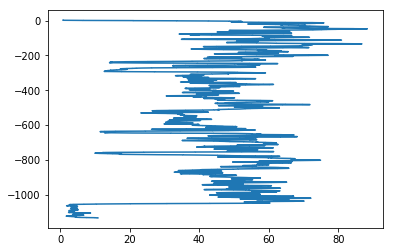

In [4]:
plt.plot(well_log["GR"], well_log['DEPT']*-1) 

Let's make this plot look more like what we would find in a petrophysical package. First we will select a colormap. I like `copper_r` for gamma-ray curves because it looks more like sand and shale. The `_r` just reverses the colormap so low values are orange, and high values are black (sand has low API values, shale has high API values). Obviously you can change this to whatever you like. Some choices are found here: https://matplotlib.org/examples/color/colormaps_reference.html

In [5]:
cmap = mpl.cm.copper_r #select our color map
pts = 9000 #select how many points we want to plot, change this to see different lengths of plot
x = well_log["GR"][:pts] #assign the GR values to x
y = well_log['DEPT'][:pts]*-1 #assign the depth values to y
z = x #create a third variable for the colors, you could have fun and make this another curve as well
normalize = mpl.colors.Normalize(vmin=z.min(), vmax=z.max()) #this normalizes the color bar to the min and max GR values

We have created `x` and `y` values so that takes care of the line portion of the plot. The `z` value takes care of the colors between the curve and the edge, so we are ready to now plot up our filled in curve.

Text(0.5, 1.0, 'DAVIS 32-31')

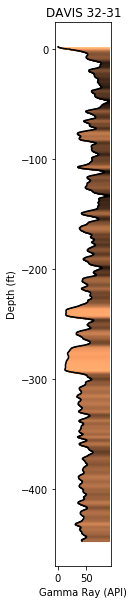

In [6]:
fig = plt.figure(figsize=(1,10)) #set our figure size and aspect
plt.plot(x, y, color="k") #this makes our line plot with the GR and depth values

#this section takes each x and y value and fills in between neighbors accoring to the normalized z value at that point
#the x2 call sets the max z value as the right hand curve that we fill between, you can change this and see what happens
for i in range(pts - 1):
    plt.fill_betweenx([y[i], y[i+1]], [x[i], x[i+1]], x2=z.max(), color=cmap(normalize(z[i])))
#add an x-axis label
plt.xlabel('Gamma Ray (API)')
#add a y-axis label
plt.ylabel('Depth (ft)')
#add a well name by reading it from the LAS file
plt.title(well_log.well['WELL'].value)

And there you have it, in 16 lines of Python we have a well log colored by gamma-ray values. Play around with values and see what you can break!

This notebook is licensed as CC-BY, use and share to your hearts content.